In [1]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt


In [2]:
df1 = pd.read_excel('Trucking.xlsx')
df1

,Driving Assignmnet,x1,n_of_deliveries,travel_time
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4
7,8,65,4,6.0
8,9,90,3,7.6
9,10,90,2,6.1


Text(0.5, 1.0, ' Simple linear regression with Miles travelled ')

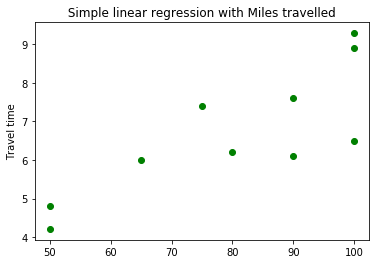

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df1['x1'],df1['travel_time'], color = "green")
plt.ylabel('Travel time') 
plt.title(' Simple linear regression with Miles travelled ')

In [6]:
Reg1 = ols(formula ="travel_time ~ x1", data = df1)
Fit1 = Reg1.fit()
print(Fit1.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Sat, 07 Sep 2019   Prob (F-statistic):            0.00408
Time:                        17:22:46   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2739      1.401      0.909      0.3

C:\Users\E T Cell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [7]:
print(anova_lm(Fit1))

           df     sum_sq    mean_sq          F   PR(>F)
x1        1.0  15.871304  15.871304  15.814578  0.00408
Residual  8.0   8.028696   1.003587        NaN      NaN


In [8]:
import seaborn as sns
sns.residplot(df1['Student_Population'],df1['Sales'], color="g")

KeyError: 'Student_Population'

In [19]:
sns.residplot?

In [21]:
influence =Fit1.get_influence() 
resid_student = influence.resid_studentized_external

In [22]:
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

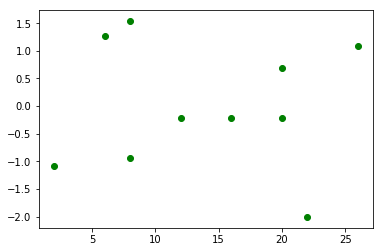

In [24]:
plt.figure()
plt.scatter(df1['Student_Population'],resid_student, color = "green")

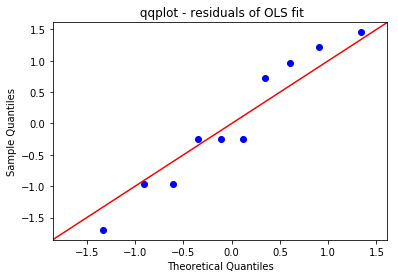

In [29]:
from scipy import stats
import statsmodels.api as sm
res = Fit1.resid # residuals
probplot = sm.ProbPlot(res,stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title(' qqplot - residuals of OLS fit') 
plt.show()